Explained Variance Ratio: [0.44708234 0.23287469]


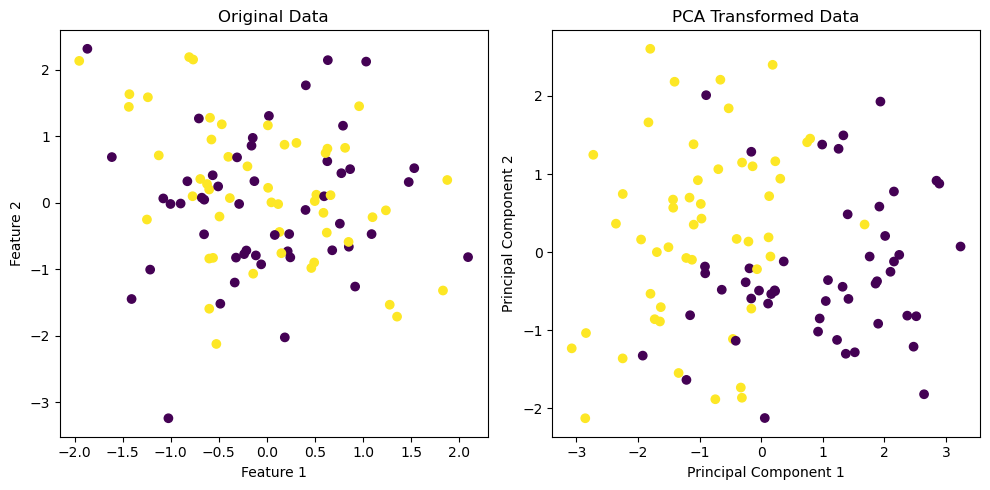

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate a random dataset with 4 features
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Scatter plot the original data and the transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


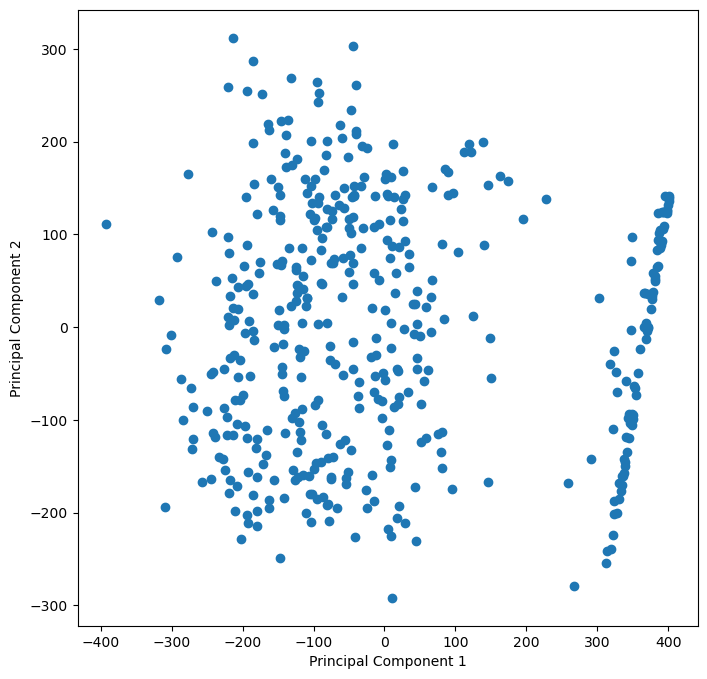

In [4]:
import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the ARFF file
data = arff.load(r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2017.arff')

# Convert the generator to a list
data_list = list(data)

# Create a DataFrame from the list
df = pd.DataFrame(data_list)

# Create a LabelEncoder object
le = LabelEncoder()

# Apply the LabelEncoder to each column with non-numerical values
for column in df.columns:
 if df[column].dtype == 'object':
    df[column] = le.fit_transform(df[column])

# Now your DataFrame only contains numerical values, you can apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

# Create a DataFrame for the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Plot the principal components
plt.figure(figsize = (8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [14]:
import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# List of file paths
file_paths = [
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2017.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2018.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2019.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2020.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2021 Q1.arff',
]

# Load datasets into a list of DataFrames
dfs = [pd.DataFrame(list(arff.load(file_path))) for file_path in file_paths]

# Concatenate DataFrames along rows
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Check for missing values
missing_values = merged_df.isnull().sum()

# Handle missing values (example: drop rows with any missing values)
merged_df = merged_df.dropna()

# Apply LabelEncoder to object columns after converting values to strings
le = LabelEncoder()
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].astype(str)
        merged_df[column] = le.fit_transform(merged_df[column])

# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(merged_df)

# Continue with the analysis using principalComponents
# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\t", explained_variance_ratio)

# Print the eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues:\t\t\t", eigenvalues)

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:\t", cumulative_explained_variance)

Explained Variance Ratio:	 [0.4172533  0.08504119]
Eigenvalues:			 [1405229.4284625   286402.49043458]
Cumulative Explained Variance:	 [0.4172533 0.5022945]


In [17]:
import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD

# List of file paths
file_paths = [
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2017.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2018.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2019.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2020.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2021 Q1.arff',
]

# Load datasets into a list of DataFrames
dfs = [pd.DataFrame(list(arff.load(file_path))) for file_path in file_paths]

# Concatenate DataFrames along rows
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Check for missing values
missing_values = merged_df.isnull().sum()

# Handle missing values (example: drop rows with any missing values)
merged_df = merged_df.dropna()

# Apply LabelEncoder to object columns after converting values to strings
le = LabelEncoder()
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].astype(str)
        merged_df[column] = le.fit_transform(merged_df[column])

# Apply PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(merged_df)

# Apply Truncated SVD
svd = TruncatedSVD(n_components=2)
principalComponents_svd = svd.fit_transform(merged_df)

# Continue with the analysis using principalComponents_pca and principalComponents_svd

# Print the explained variance ratio for PCA
explained_variance_ratio_pca = pca.explained_variance_ratio_
print("Explained Variance Ratio (PCA):\t", explained_variance_ratio_pca)

# Print the eigenvalues for PCA
eigenvalues_pca = pca.explained_variance_
print("Eigenvalues (PCA):\t\t\t", eigenvalues_pca)

# Calculate cumulative explained variance for PCA
cumulative_explained_variance_pca = explained_variance_ratio_pca.cumsum()
print("Cumulative Explained Variance (PCA):\t", cumulative_explained_variance_pca)

# Print the explained variance ratio for SVD
explained_variance_ratio_svd = svd.explained_variance_ratio_
print("\nExplained Variance Ratio (SVD):\t", explained_variance_ratio_svd)

# Print the singular values for SVD
singular_values_svd = svd.singular_values_
print("Singular Values (SVD):\t\t\t", singular_values_svd)

# Calculate cumulative explained variance for SVD
cumulative_explained_variance_svd = explained_variance_ratio_svd.cumsum()
print("Cumulative Explained Variance (SVD):\t", cumulative_explained_variance_svd)



Explained Variance Ratio (PCA):	 [0.4172533  0.08504119]
Eigenvalues (PCA):			 [1405229.4284625  286402.4904364]
Cumulative Explained Variance (PCA):	 [0.4172533 0.5022945]

Explained Variance Ratio (SVD):	 [0.36837609 0.08561443]
Singular Values (SVD):			 [133109.6694485  26344.7020133]
Cumulative Explained Variance (SVD):	 [0.36837609 0.45399051]


In [21]:
import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
import numpy as np

# List of file paths
file_paths = [
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2017.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2018.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2019.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2020.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2021 Q1.arff',
]

# Load datasets into a list of DataFrames
dfs = [pd.DataFrame(list(arff.load(file_path))) for file_path in file_paths]

# Concatenate DataFrames along rows
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Check for missing values
missing_values = merged_df.isnull().sum()

# Handle missing values (example: drop rows with any missing values)
merged_df = merged_df.dropna()

# Apply LabelEncoder to object columns after converting values to strings
le = LabelEncoder()
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].astype(str)
        merged_df[column] = le.fit_transform(merged_df[column])

# Apply PCA
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(merged_df)

# Print the explained variance ratio for PCA
explained_variance_ratio_pca = pca.explained_variance_ratio_
print("Explained Variance Ratio (PCA):\t\t", explained_variance_ratio_pca)

# Print the eigenvalues for PCA
eigenvalues_pca = pca.explained_variance_
print("Eigenvalues (PCA):\t\t\t", eigenvalues_pca)

# Calculate cumulative explained variance for PCA
cumulative_explained_variance_pca = explained_variance_ratio_pca.cumsum()
print("Cumulative Explained Variance (PCA):\t", cumulative_explained_variance_pca)

# Apply Truncated SVD
svd = TruncatedSVD(n_components=2)
principalComponents_svd = svd.fit_transform(merged_df)

# Continue with the analysis using principalComponents_svd

# Print the explained variance ratio for SVD
explained_variance_ratio_svd = svd.explained_variance_ratio_
print("\nExplained Variance Ratio (SVD):\t\t", explained_variance_ratio_svd)

# Print the singular values for SVD
singular_values_svd = svd.singular_values_
print("Singular Values (SVD):\t\t\t", singular_values_svd)

# Calculate cumulative explained variance for SVD
cumulative_explained_variance_svd = explained_variance_ratio_svd.cumsum()
print("Cumulative Explained Variance (SVD):\t", cumulative_explained_variance_svd)


Explained Variance Ratio (PCA):		 [0.4172533  0.08504119]
Eigenvalues (PCA):			 [1405229.4284625   286402.49043536]
Cumulative Explained Variance (PCA):	 [0.4172533 0.5022945]

Explained Variance Ratio (SVD):		 [0.36837609 0.08561444]
Singular Values (SVD):			 [133109.6694485   26344.70204755]
Cumulative Explained Variance (SVD):	 [0.36837609 0.45399053]


In [ ]:
import numpy as np

def center_data(X):
    # Center the data by subtracting the mean of each feature
    mean_vals = np.mean(X, axis=0)
    centered_data = X - mean_vals
    return centered_data, mean_vals

def calculate_covariance_matrix(X):
    # Calculate the covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)
    return covariance_matrix

def perform_pca(X, num_components):
    # Center the data
    centered_data, mean_vals = center_data(X)
    
    # Calculate the covariance matrix
    covariance_matrix = calculate_covariance_matrix(centered_data)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Choose the top 'num_components' eigenvectors
    selected_eigenvectors = eigenvectors[:, :num_components]

    # Project the data onto the new subspace
    pca_result = np.dot(centered_data, selected_eigenvectors)

    # Calculate explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    # Calculate cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)[:num_components]

    return pca_result, eigenvalues, explained_variance_ratio, cumulative_explained_variance

# Load and preprocess data
file_paths = [
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2017.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2018.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2019.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2020.arff',
    r'C:\Users\ACER\Documents\Python\cs3101-prefinals\dataset\2021 Q1.arff',
]

data = load_and_preprocess_data(file_paths)

# Convert DataFrame to numpy array
X = data.values

# Perform PCA manually with 2 components
num_components = 2
pca_result, eigenvalues, explained_variance_ratio, cumulative_explained_variance = perform_pca(X, num_components)

# Display the results
print("PCA Results:")
print("Explained Variance Ratio (PCA):\t", explained_variance_ratio[:num_components])
print("Eigenvalues (PCA):\t\t\t", eigenvalues[:num_components])
print("Cumulative Explained Variance (PCA):\t", cumulative_explained_variance)
